**Principal Component Analysis**

You will implement dimensionality reduction with PCA.  

1). Read iris_dataset.csv (4 features, hence 4 PCs) and remove the first class

2). Find the principal components

3). Recontruct the dataset (X_hat)

4). Determine the accuracy of X_hat for 1-4 PCs using a LBF SVM classifier (provided)


In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.svm import SVC # This package will help you run the SVM model directly
from sklearn.metrics import accuracy_score # Use accruacy_score to find out accuracy of your model
from sklearn.model_selection import train_test_split

# Load data - 150 observations, 4 features, 3 classes 
df = pd.read_csv("iris_dataset.csv", header=None)
data = df.values

# Remove the first class and change the class index
X_raw = data[50:,0:4]               # From 150 to 100 samples
y = np.subtract(data[50:,4],2)  # From class 2/3 to class 0/1

SVM classifier (with 20% of the data as the test sets)

In [2]:
def svm_accuracy(X_hat, y, num_pc):
    X_train, X_test, y_train, y_test = train_test_split(X_hat, y, test_size=0.2)

    clf = SVC(kernel='linear') # Use the linear function of the SVM algorithm
    clf.fit(X_train,y_train) # Train the model using the x_train and y_train
    y_pred = clf.predict(X_test) # Run prediction after training on the testing dataset
    acc = accuracy_score(y_test,y_pred)
    print(num_pc, acc) # Print your final accuracy
    return acc

PCA (Your code goes here)

In [3]:
def PCA(X, Num_PC):
    # Note that the matrix X in the program is transpose of that in the slides
    # Note that eigenvectors in the program is transpose of those in the slides
    
    # To-Do
    # First, compute the the covariance matrix
    covariance_matrix = np.matmul(X.T, X)
    # Second, use LA.eig to compute the eigen_values, eigen_vectors
    eigen_values, eigen_vectors = LA.eig(covariance_matrix)
    # Third, sort the eigenvalues/the eigvenvectors in descending order
    sorted_array = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[sorted_array]
    eigen_vectors = eigen_vectors[sorted_array]
    # Fourth, select the first Num_PC eigenvectors
    first_num_pc = eigen_vectors[:Num_PC].T
    # Fifth, transform the data into the desired dimension  
    X_reduced = np.dot(X, first_num_pc)
    return X_reduced

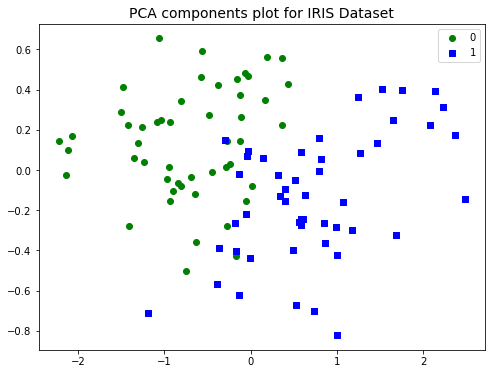

1 0.85
1 0.75
1 0.75
1 0.8
1 0.75
1 0.7
1 0.7
1 0.85
1 0.8
1 0.95
Value:  [0.85, 0.75, 0.75, 0.8, 0.75, 0.7, 0.7, 0.85, 0.8, 0.95]
average accuracy:  0.79
2 0.95
2 0.9
2 0.9
2 0.85
2 0.85
2 0.85
2 0.9
2 0.95
2 0.75
2 0.9
Value:  [0.95, 0.9, 0.9, 0.85, 0.85, 0.85, 0.9, 0.95, 0.75, 0.9]
average accuracy:  0.8800000000000001
3 1.0
3 0.9
3 0.95
3 0.95
3 1.0
3 0.95
3 0.95
3 0.85
3 1.0
3 1.0
Value:  [1.0, 0.9, 0.95, 0.95, 1.0, 0.95, 0.95, 0.85, 1.0, 1.0]
average accuracy:  0.9550000000000001
4 1.0
4 1.0
4 1.0
4 0.95
4 0.95
4 0.95
4 0.9
4 0.95
4 0.95
4 0.95
Value:  [1.0, 1.0, 1.0, 0.95, 0.95, 0.95, 0.9, 0.95, 0.95, 0.95]
average accuracy:  0.96


In [4]:
# Perform zero means
u = [np.mean(X_raw[:,0]), np.mean(X_raw[:,1]), np.mean(X_raw[:,2]), np.mean(X_raw[:,3])]
XM = np.subtract(X_raw,u)  # Subtracting the mean from each feature

# Visualize the dataset with the projection to 2 principal components
X_pca = PCA(XM,2)  # Applying PCA with 2 components

plt.figure(figsize=(8,6))

# Scatter plot for class 0
plt.scatter(X_pca[0:50,0], X_pca[0:50,1], color='green', marker='o', label='0')

# Scatter plot for class 1
plt.scatter(X_pca[50:100,0], X_pca[50:100,1], color='blue', marker='s', label='1')
 
plt.title("PCA components plot for IRIS Dataset", fontsize=14)
plt.legend()
plt.show()

# Measuring the accuracy vs. the number of components
for i in range(4):
    acc_list = []
    num_pc = i+1
    X_hat = PCA(XM,num_pc) # Applying PCA with the current number of components
    for r in range(10):
        # Call the function evaluate_accuracy 
        accuracy = svm_accuracy(X_hat, y, num_pc)  # classification accuracy with 1-4 PC
        acc_list.append(accuracy) 
    average_acc = np.mean(acc_list)
    print('Value: ', acc_list)
    print('average accuracy: ', average_acc)